# **TensorFlow 2.0**

In [8]:
import os
from glob import glob

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

import matplotlib.pyplot as plt
%matplotlib inline

# **Hyperparameter Tunning**

In [4]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

# **Build Model**

In [6]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding = 'SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(32, (3, 3), padding='SAME')(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding = 'SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size = (2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs , outputs=net, name = 'Basic_CNN')

In [71]:
# Model is the full model w/o custorm layers
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate), #Optimization
              loss = 'categorical_crossentropy', # Loss Function
              metrics = ['accuracy']) # Metrics / Accuracy

# **Data Preprocess**

In [47]:
train_paths = glob('E:\\dataset\\cifar\\train\\*.png')
test_paths = glob('E:\\dataset\\cifar\\test\\*.png')
test_paths

['E:\\dataset\\cifar\\test\\0_cat.png',
 'E:\\dataset\\cifar\\test\\1000_dog.png',
 'E:\\dataset\\cifar\\test\\1001_airplane.png',
 'E:\\dataset\\cifar\\test\\1002_ship.png',
 'E:\\dataset\\cifar\\test\\1003_deer.png',
 'E:\\dataset\\cifar\\test\\1004_ship.png',
 'E:\\dataset\\cifar\\test\\1005_automobile.png',
 'E:\\dataset\\cifar\\test\\1006_automobile.png',
 'E:\\dataset\\cifar\\test\\1007_ship.png',
 'E:\\dataset\\cifar\\test\\1008_truck.png',
 'E:\\dataset\\cifar\\test\\1009_frog.png',
 'E:\\dataset\\cifar\\test\\100_deer.png',
 'E:\\dataset\\cifar\\test\\1010_airplane.png',
 'E:\\dataset\\cifar\\test\\1011_ship.png',
 'E:\\dataset\\cifar\\test\\1012_frog.png',
 'E:\\dataset\\cifar\\test\\1013_automobile.png',
 'E:\\dataset\\cifar\\test\\1014_cat.png',
 'E:\\dataset\\cifar\\test\\1015_deer.png',
 'E:\\dataset\\cifar\\test\\1016_automobile.png',
 'E:\\dataset\\cifar\\test\\1017_frog.png',
 'E:\\dataset\\cifar\\test\\1018_airplane.png',
 'E:\\dataset\\cifar\\test\\1019_dog.png',
 'E

In [11]:
path = train_paths[0]
path

'E:\\dataset\\cifar\\train\\0_frog.png'

In [18]:
def get_class_name(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    return lbl_name

In [33]:
class_names = [get_class_name(path) for path in train_paths]
classes = tf.unique(class_names).y.numpy()

In [43]:
def onehot_encoding(label_name):
    classes ==get_class_name(path)
    onehot_encoding = tf.cast(classes == get_class_name(path), tf.uint8)
    return onehot_encoding

In [62]:
def read_dataset(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    image = tf.cast(image, tf.float32)/ 255.
    
    # read label
    class_name = get_class_name(path)
    label = onehot_encoding(class_name)
    return image, label

In [50]:
image, label = read_dataset(path)
image.shape, label.shape

(TensorShape([32, 32, 3]), TensorShape([10]))

In [56]:
def image_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [57]:
transformed, label = image_preprocess(image, label)

In [59]:
transformed.shape

TensorShape([32, 32, 3])

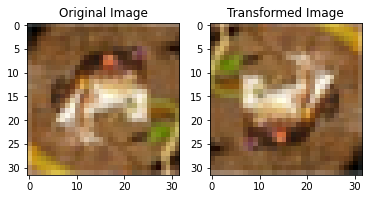

In [61]:
plt.subplot(121)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(transformed)
plt.show()

In [67]:
class_names = [get_class_name(path) for path in train_paths]
classes = tf.unique(class_names).y.numpy()

def get_class_name(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    return lbl_name

def onehot_encoding(label_name):
    classes ==get_class_name(path)
    onehot_encoding = tf.cast(classes == get_class_name(path), tf.uint8)
    return onehot_encoding

In [65]:
def read_dataset(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    image = tf.cast(image, tf.float32)/ 255.
    
    # read label
    class_name = get_class_name(path)
    label = onehot_encoding(class_name)
    return image, label

In [66]:
def image_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [63]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(read_dataset)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size = len(train_paths))
train_dataset = train_dataset.repeat()

In [64]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size = len(test_paths))
test_dataset = test_dataset.repeat()

# **Training**

In [69]:
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(test_paths) // batch_size

In [72]:
model.fit_generator(
    train_dataset,
    steps_per_epoch = steps_per_epoch,
    validation_data=test_dataset,
    validation_steps = validation_steps,
    epochs = num_epochs
)

Epoch 1/10
1562/1562 [==============================] - 96s 61ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1562/1562 [==============================] - 71s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1562/1562 [==============================] - 52s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1562/1562 [==============================] - 52s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1562/1562 [==============================] - 52s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1562/1562 [==============================] - 52s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1562/1562 [==============================] - 52s 33ms/step - loss: 0.